Brief information about Olivetti Dataset:

Face images taken between April 1992 and April 1994.

There are ten different image of each of 40 distinct people

There are 400 face images in the dataset

Face images were taken at different times, variying ligthing, facial express and facial detail

All face images have black background

The images are gray level

Size of each image is 64x64

Image pixel values were scaled to [0, 1] interval

Names of 40 people were encoded to an integer from 0 to 39





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
data = fetch_olivetti_faces() #load dataset
X = data.images.reshape((len(data.images), -1)) #Training set
y = data.target #Target set


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


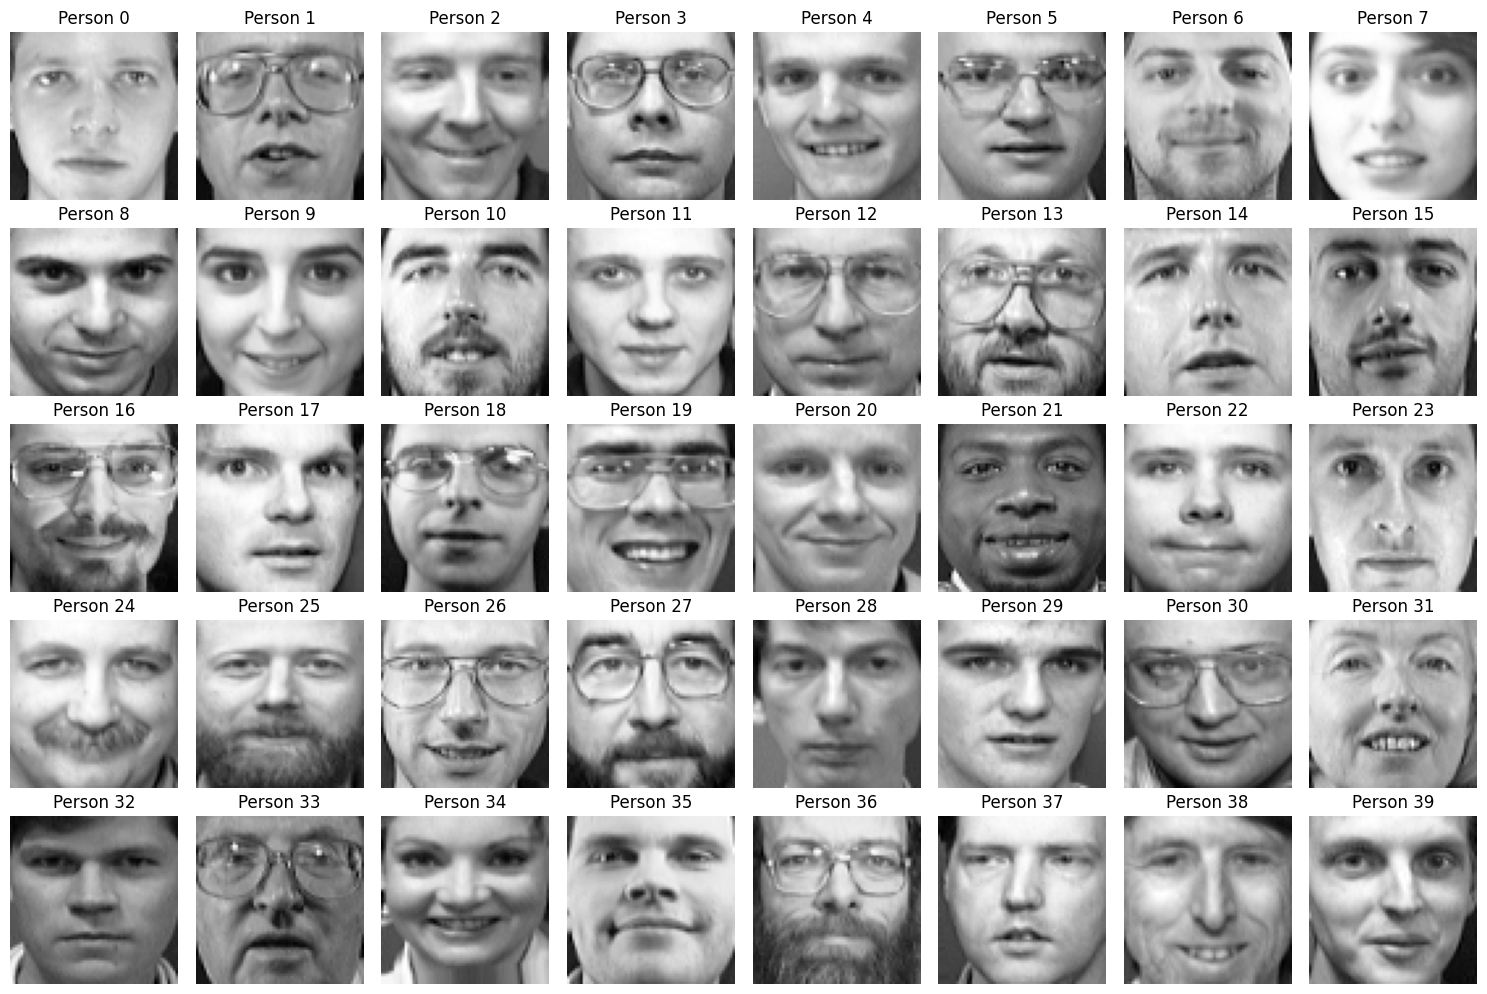

In [ ]:
fig, ax = plt.subplots(5, 8, figsize=(15, 10)) #Using matplot lib to visualize the images
ax = ax.flatten()

for i in range(40): #loop to show all 40 people
    idx = np.where(y == i)[0][0] #
    ax[i].imshow(X[idx].reshape(64, 64), cmap='gray')
    ax[i].set_title(f'Person {i}')
    ax[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #splitting into test set for testing


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42) #using a random forest model for the classification task
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test) #testing on our test set
print("Accuracy:", accuracy_score(y_test, y_pred)) #accuracy score
print(classification_report(y_test, y_pred)) #classification report


Accuracy: 0.88
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         1
           7       1.00      0.43      0.60         7
           8       0.67      1.00      0.80         2
           9       0.75      1.00      0.86         3
          10       0.75      1.00      0.86         3
          11       1.00      0.75      0.86         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       0.67      1.00      0.80         2
          16       0.00      0.00      0.00         0
          17

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


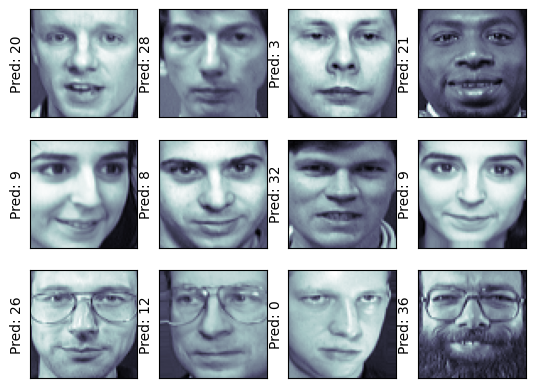

In [ ]:
fig, ax = plt.subplots(3, 4) #visualizing and testing the model on the test set
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(64, 64), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(f'Pred: {y_pred[i]}', color='black')
plt.show()
